# **Task 1 : House Price Prediction**

*Use a dataset that includes information about housing prices and features like square footage, number of bedrooms, etc. to train a model that can predict the price of a new house*

**About Dataset**

*   This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
*   It's a great dataset for evaluating simple regression models.





**Features**

Certainly! Here are the rephrased sentences using the provided format:

1. **id:** A distinctive identifier for each house sale.

2. **date:** Indication of when the house sale occurred.

3. **price:** The selling amount of the house (target variable).

4. **bedrooms:** Count of bedrooms in the house.

5. **bathrooms:** Quantity of bathrooms in the house.

6. **sqft_living:** Area in square footage of the living space.

7. **sqft_lot:** Area in square footage of the lot.

8. **floors:** Count of floors in the house.

9. **waterfront:** Denotes whether the house has a view of the waterfront (binary: 0 or 1).

10. **view:** Index from 0 to 4 representing the property's view.

11. **condition:** Overall condition of the house.

12. **grade:** Overall grade given to the housing unit, based on the King County grading system.

13. **sqft_above:** Square footage of the house apart from the basement.

14. **sqft_basement:** Square footage of the basement.

15. **yr_built:** Year the house was built.

16. **yr_renovated:** Year when the house was last renovated.

17. **zipcode:** Zip code of the location of the house.

18. **lat:** Latitude coordinate of the house.

19. **long:** Longitude coordinate of the house.

20. **sqft_living15:** Average square footage of interior housing living space for the 15 nearest neighbors.

21. **sqft_lot15:** Average square footage of the land lots of the 15 nearest neighbors.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('kc_house_data.csv')

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['sale_year'] = data['date'].dt.year
data = data[data['sale_year'] != 2014]

In [ ]:
data['bedrooms_cat'] = data['bedrooms'].astype('category')
data['bathrooms_cat'] = data['bathrooms'].astype('category')

<ipython-input-9-e8b8d1bbe3f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bedrooms_cat'] = data['bedrooms'].astype('category')
<ipython-input-9-e8b8d1bbe3f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathrooms_cat'] = data['bathrooms'].astype('category')


In [ ]:
data = data.drop(['id', 'date', 'bedrooms', 'bathrooms'], axis=1)

In [ ]:
data.dropna(inplace = True)

In [ ]:
X = data.drop(['price'], axis=1)
y = data['price']

numerical_features = ['bedrooms', 'bathrooms', 'sqft_living']
categorical_features = ['bedrooms_cat', 'bathrooms_cat', 'condition', 'floors', 'grade']

X = pd.get_dummies(X, columns = categorical_features, drop_first = True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
333,1070,5000,0,0,1070,0,1924,0,98103,47.6666,...,0,0,0,1,0,0,0,0,0,0
111,1260,3328,0,0,700,560,1905,0,98103,47.6823,...,0,0,1,0,0,0,0,0,0,0
16735,1580,6860,0,0,1580,0,1995,0,98055,47.4447,...,0,0,0,1,0,0,0,0,0,0
21214,3090,7069,0,0,3090,0,2012,0,98056,47.5114,...,0,0,0,0,0,1,0,0,0,0
6638,2410,4250,0,0,1460,950,1929,0,98117,47.6849,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11637,900,10511,0,0,900,0,1961,0,98001,47.2883,...,0,0,1,0,0,0,0,0,0,0
16009,3970,210830,0,0,3970,0,2000,0,98045,47.4614,...,0,0,0,0,0,1,0,0,0,0
16101,2120,15000,0,0,2120,0,1983,0,98052,47.7159,...,0,0,0,0,1,0,0,0,0,0
16621,1980,9725,0,0,1980,0,1994,0,98045,47.4856,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
x_test

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
12738,1980,7081,0,0,1470,510,1977,0,98032,47.3669,...,0,0,0,1,0,0,0,0,0,0
10678,2190,7904,0,0,2190,0,1995,0,98092,47.2617,...,0,0,0,0,1,0,0,0,0,0
13303,2030,10200,0,0,2030,0,1958,0,98002,47.2867,...,0,0,0,1,0,0,0,0,0,0
10217,2260,10800,0,0,2260,0,1978,0,98007,47.6124,...,0,0,0,0,0,1,0,0,0,0
1500,1700,8247,0,0,1010,690,1970,0,98031,47.4216,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15811,1430,5600,0,0,1430,0,1947,0,98118,47.5192,...,0,0,1,0,0,0,0,0,0,0
21137,1150,698,0,0,1150,0,2013,0,98027,47.5323,...,0,0,0,1,0,0,0,0,0,0
18977,3220,7889,0,0,3220,0,1978,0,98023,47.3112,...,0,0,0,0,1,0,0,0,0,0
9547,2040,7936,0,3,1680,360,1940,0,98177,47.7028,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train

333      640000.0
111      570000.0
16735    290000.0
21214    615000.0
6638     735000.0
           ...   
11637    178500.0
16009    775000.0
16101    637000.0
16621    470000.0
2765     420000.0
Name: price, Length: 5235, dtype: float64

In [ ]:
y_test

12738     287000.0
10678     269100.0
13303     246000.0
10217     685000.0
1500      249000.0
           ...    
15811     440000.0
21137     346100.0
18977     335000.0
9547     1300000.0
8727      650000.0
Name: price, Length: 1745, dtype: float64

In [ ]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rfr.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 15561778813.414528


In [ ]:
new_house = {'bedrooms': 3, 'bathrooms': 2, 'sqft_living': 1500, 'bedrooms_cat': '3', 'bathrooms_cat': '2', 'condition': 3, 'floors': 1, 'grade': 7}

new_house_df = pd.DataFrame([new_house])
new_house_df = new_house_df.reindex(columns = X.columns, fill_value = 0)

In [ ]:
new_house_price = rfr.predict(new_house_df)
print('Predicted price:', new_house_price[0])

Predicted price: 260962.98


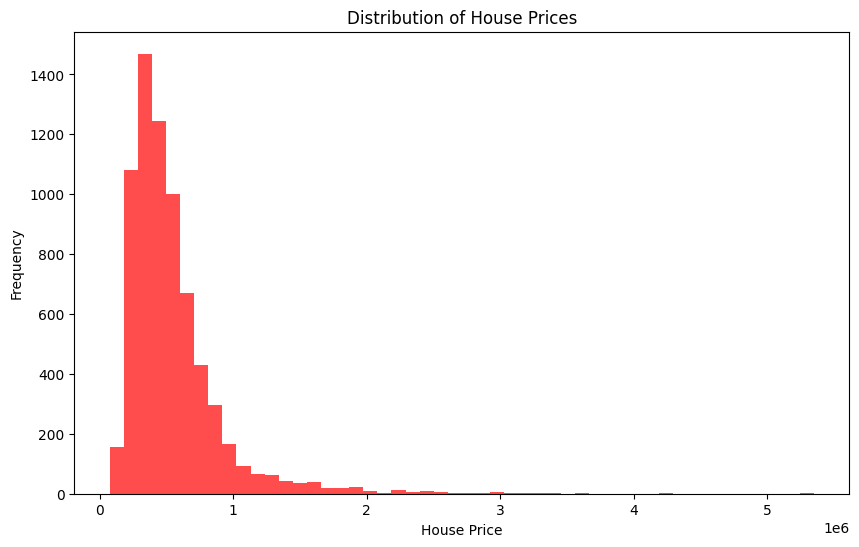

In [ ]:
plt.figure(figsize = (10, 6))
plt.hist(y, bins = 50, color = 'red', alpha = 0.7)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

<ipython-input-24-0f6bace8ea80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr(), cmap = 'viridis', fignum = 1)


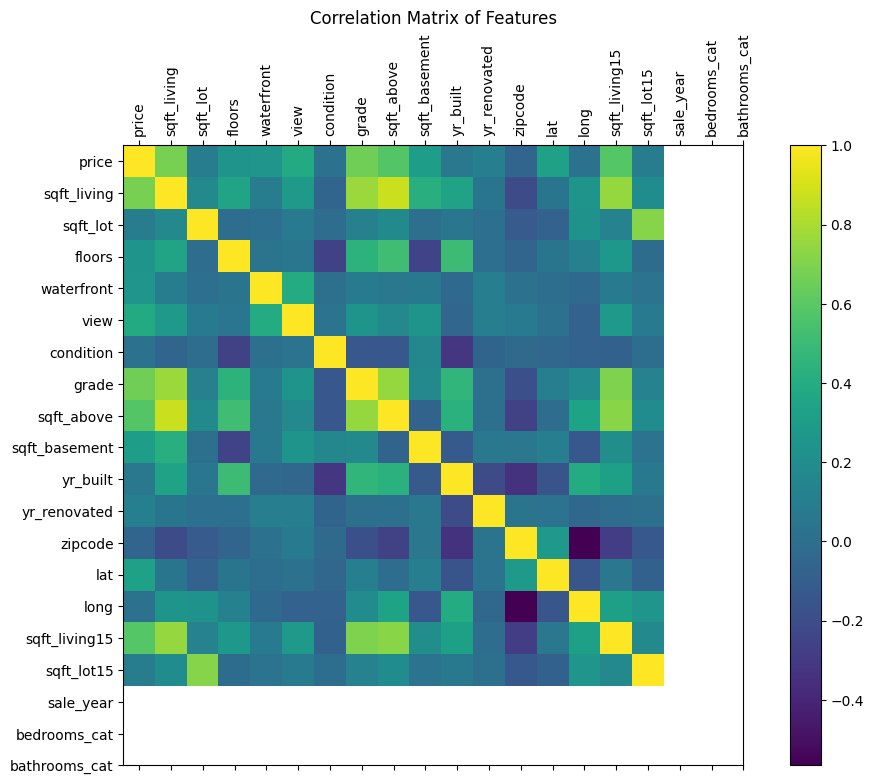

In [ ]:
plt.figure(figsize = (12, 8))
plt.matshow(data.corr(), cmap = 'viridis', fignum = 1)
plt.colorbar()
plt.title('Correlation Matrix of Features')
plt.xticks(range(data.shape[1]), data.columns, fontsize = 10, rotation = 90)
plt.yticks(range(data.shape[1]), data.columns, fontsize = 10)
plt.show()

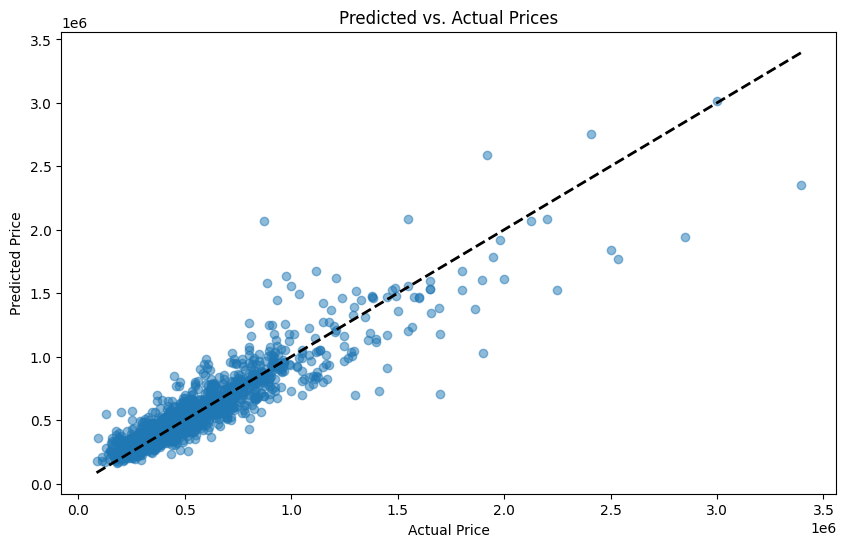

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth = 2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Prices')
plt.show()